In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# https://fred.stlouisfed.org/series/FEDFUNDS
ff_rate = pd.read_csv(
    "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=FEDFUNDS&scale=left&cosd=1954-07-01&coed=2021-05-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-06-17&revision_date=2021-06-17&nd=1954-07-01",
    index_col=0,
    parse_dates=True,
)
ff_rate

,FEDFUNDS
DATE,
1954-07-01,0.80
1954-08-01,1.22
1954-09-01,1.07
1954-10-01,0.85
1954-11-01,0.83
...,...
2021-01-01,0.09
2021-02-01,0.08
2021-03-01,0.07


In [3]:
# https://fred.stlouisfed.org/series/STICKCPIM158SFRBATL
# cpi as annualized pct change
cpi = pd.read_csv(
    "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=STICKCPIM158SFRBATL&scale=left&cosd=1997-11-01&coed=2021-05-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-06-15&revision_date=2021-06-15&nd=1967-01-01",
    index_col=0,
    parse_dates=True,
)
cpi

,STICKCPIM158SFRBATL
DATE,
1997-11-01,2.361950
1997-12-01,3.021246
1998-01-01,2.966999
1998-02-01,2.327384
1998-03-01,2.997078
...,...
2021-01-01,1.129161
2021-02-01,2.316800
2021-03-01,3.465632


In [4]:
sp500_t = yf.Ticker("^GSPC")
sp500_t

yfinance.Ticker object <^GSPC>

In [5]:
sp500 = sp500_t.history(period='max')
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0,0,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,0,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,0,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,0,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,0,0
...,...,...,...,...,...,...,...
2021-06-11,4242.899902,4248.379883,4232.250000,4247.439941,3204280000,0,0
2021-06-14,4248.310059,4255.589844,4234.069824,4255.149902,3612050000,0,0
2021-06-15,4255.279785,4257.160156,4238.350098,4246.589844,3578450000,0,0


In [6]:
sp500 = sp500.asfreq('D')

In [7]:
sp_return = sp500['Close'].pct_change(periods=365)
sp_return

Date
1927-12-30         NaN
1927-12-31         NaN
1928-01-01         NaN
1928-01-02         NaN
1928-01-03         NaN
                ...   
2021-06-13    0.396582
2021-06-14    0.399117
2021-06-15    0.384792
2021-06-16    0.351697
2021-06-17    0.358665
Freq: D, Name: Close, Length: 34139, dtype: float64

In [8]:
df = pd.DataFrame()
df['ffrate'] = ff_rate['FEDFUNDS']
df['cpi'] = cpi['STICKCPIM158SFRBATL']
df['sp500'] = sp_return
df

,ffrate,cpi,sp500
DATE,,,
1954-07-01,0.80,NaN,0.205033
1954-08-01,1.22,NaN,0.247677
1954-09-01,1.07,NaN,0.282664
1954-10-01,0.85,NaN,0.374628
1954-11-01,0.83,NaN,0.295436
...,...,...,...
2021-01-01,0.09,1.129161,0.152929
2021-02-01,0.08,2.316800,0.170001
2021-03-01,0.07,3.465632,0.320762


In [66]:
recent = df['19990101':].copy()

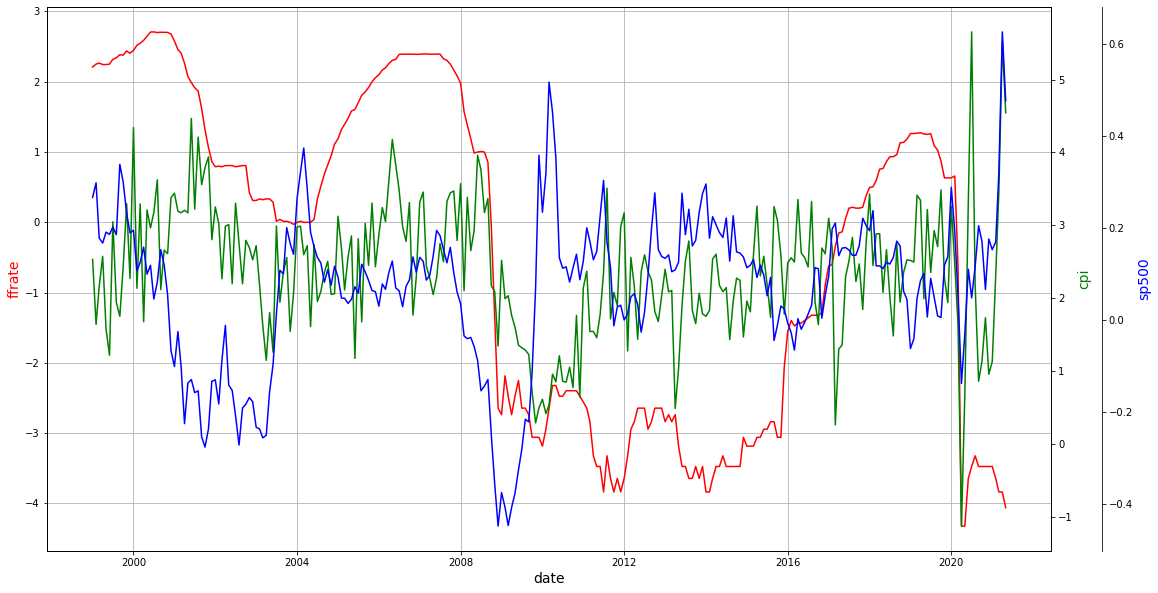

In [9]:
fig, ax = plt.subplots(figsize=(18,10))
p1, = ax.plot(recent.index, np.log2(recent['ffrate']), color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("ffrate",color="red",fontsize=14)
ax.grid()

ax2 = ax.twinx()
p2, = ax2.plot(recent.index, recent['cpi'], color="green")
ax2.set_ylabel("cpi", color="green", fontsize=14)

ax3 = ax.twinx()
ax3.plot(recent.index, recent['sp500'], color="blue")
ax3.set_ylabel("sp500", color="blue", fontsize=14)
#ax3.axis["right"] = ax3.new_fixed_axis(loc="right", offset=(60, 0))
ax3.spines.right.set_position(("axes", 1.05))

plt.show()



In [10]:
recent.corr()

,ffrate,cpi,sp500
ffrate,1.000000,0.388408,0.002525
cpi,0.388408,1.000000,-0.081284
sp500,0.002525,-0.081284,1.000000


In [69]:
sffrec = recent.copy()
for i in range(1, 51):
    sffrec[f'sffrate{i}'] = sffrec['ffrate'].shift(i)

In [70]:
sffrec.corr()

,ffrate,cpi,sp500,sffrate1,sffrate2,sffrate3,sffrate4,sffrate5,sffrate6,sffrate7,...,sffrate41,sffrate42,sffrate43,sffrate44,sffrate45,sffrate46,sffrate47,sffrate48,sffrate49,sffrate50
ffrate,1.000000,0.388408,0.002525,0.996175,0.987347,0.975009,0.959522,0.941192,0.919854,0.895552,...,-0.084581,-0.084597,-0.082631,-0.078646,-0.072614,-0.064795,-0.053643,-0.040635,-0.026221,-0.010471
cpi,0.388408,1.000000,-0.081284,0.392295,0.400848,0.409891,0.425633,0.447322,0.459242,0.451102,...,-0.239647,-0.236985,-0.240808,-0.240595,-0.234444,-0.231420,-0.226946,-0.220580,-0.217337,-0.209580
sp500,0.002525,-0.081284,1.000000,-0.034235,-0.073881,-0.108822,-0.141843,-0.177827,-0.214069,-0.250231,...,-0.187080,-0.159878,-0.132939,-0.107096,-0.088377,-0.071922,-0.054930,-0.036671,-0.018495,-0.002831
sffrate1,0.996175,0.392295,-0.034235,1.000000,0.996163,0.987309,0.974934,0.959400,0.941014,0.919611,...,-0.083461,-0.085798,-0.086065,-0.084117,-0.080131,-0.074075,-0.066264,-0.055292,-0.042496,-0.028080
sffrate2,0.987347,0.400848,-0.073881,0.996163,1.000000,0.996151,0.987271,0.974858,0.959278,0.940836,...,-0.080045,-0.084674,-0.087266,-0.087557,-0.085610,-0.081604,-0.075559,-0.067933,-0.057178,-0.044383
sffrate3,0.975009,0.409891,-0.108822,0.987309,0.996151,1.000000,0.996140,0.987232,0.974782,0.959153,...,-0.074146,-0.081262,-0.086152,-0.088771,-0.089067,-0.087104,-0.083113,-0.077258,-0.069855,-0.059105
sffrate4,0.959522,0.425633,-0.141843,0.974934,0.987271,0.996140,1.000000,0.996128,0.987193,0.974705,...,-0.065843,-0.075353,-0.082733,-0.087654,-0.090283,-0.090565,-0.088622,-0.084825,-0.079198,-0.071805
sffrate5,0.941192,0.447322,-0.177827,0.959400,0.974858,0.987232,0.996128,1.000000,0.996116,0.987154,...,-0.055569,-0.067034,-0.076812,-0.084228,-0.089163,-0.091782,-0.092088,-0.090342,-0.086778,-0.081164
sffrate6,0.919854,0.459242,-0.214069,0.941014,0.959278,0.974782,0.987193,0.996116,1.000000,0.996104,...,-0.042647,-0.056753,-0.068490,-0.078307,-0.085741,-0.090672,-0.093319,-0.093829,-0.092321,-0.088774
sffrate7,0.895552,0.451102,-0.250231,0.919611,0.940836,0.959153,0.974705,0.987154,0.996104,1.000000,...,-0.026885,-0.043818,-0.058201,-0.069982,-0.079822,-0.087256,-0.092218,-0.095075,-0.095829,-0.094345


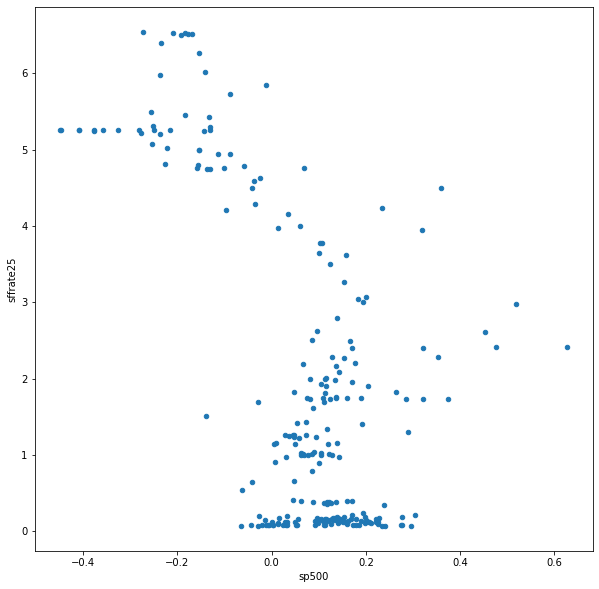

In [72]:
sffrec.plot.scatter(x='sp500', y='sffrate25', figsize=(10, 10));

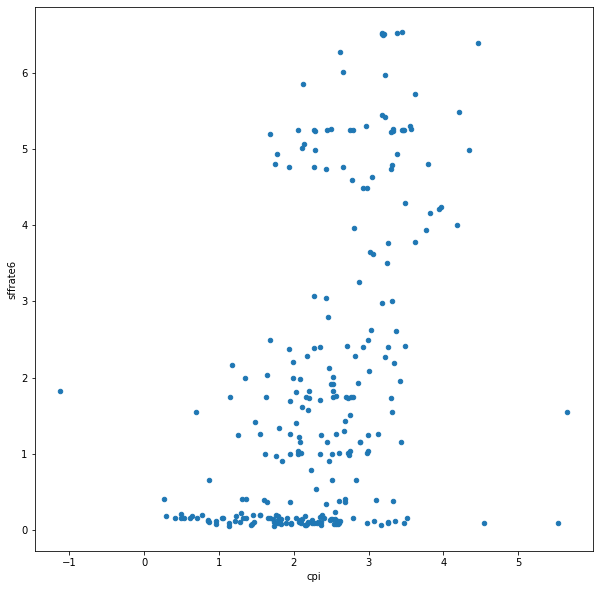

In [73]:
sffrec.plot.scatter(x='cpi', y='sffrate6', figsize=(10, 10));

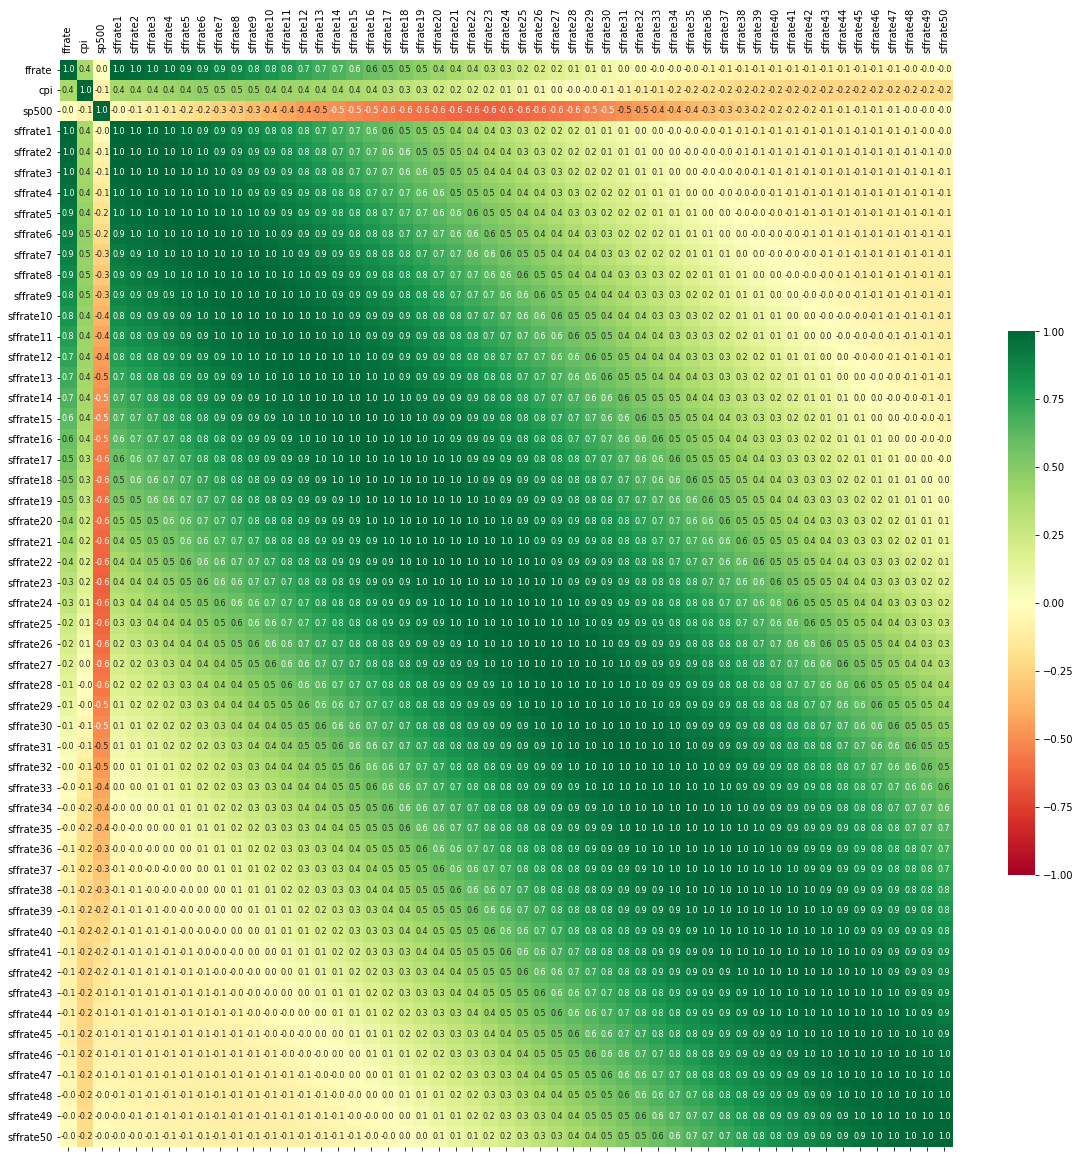

In [74]:
f, ax = plt.subplots(figsize=(20, 20))
cbar_kws = {
    "shrink": .5,
}
annot_kws = {
    'fontsize': 8
}
sns.heatmap(
    sffrec.corr(),
    annot=True,
    annot_kws=annot_kws,
    fmt='0.1f',
    ax=ax,
    cmap="RdYlGn",
    cbar_kws=cbar_kws,
    vmin=-1,
    vmax=1
)
ax.tick_params(labelbottom=False, labeltop=True)
plt.xticks(rotation=90);

In [76]:
sprec = recent.copy()
for i in range(1, 51):
    sprec[f'sp500{i}'] = sprec['sp500'].shift(i)

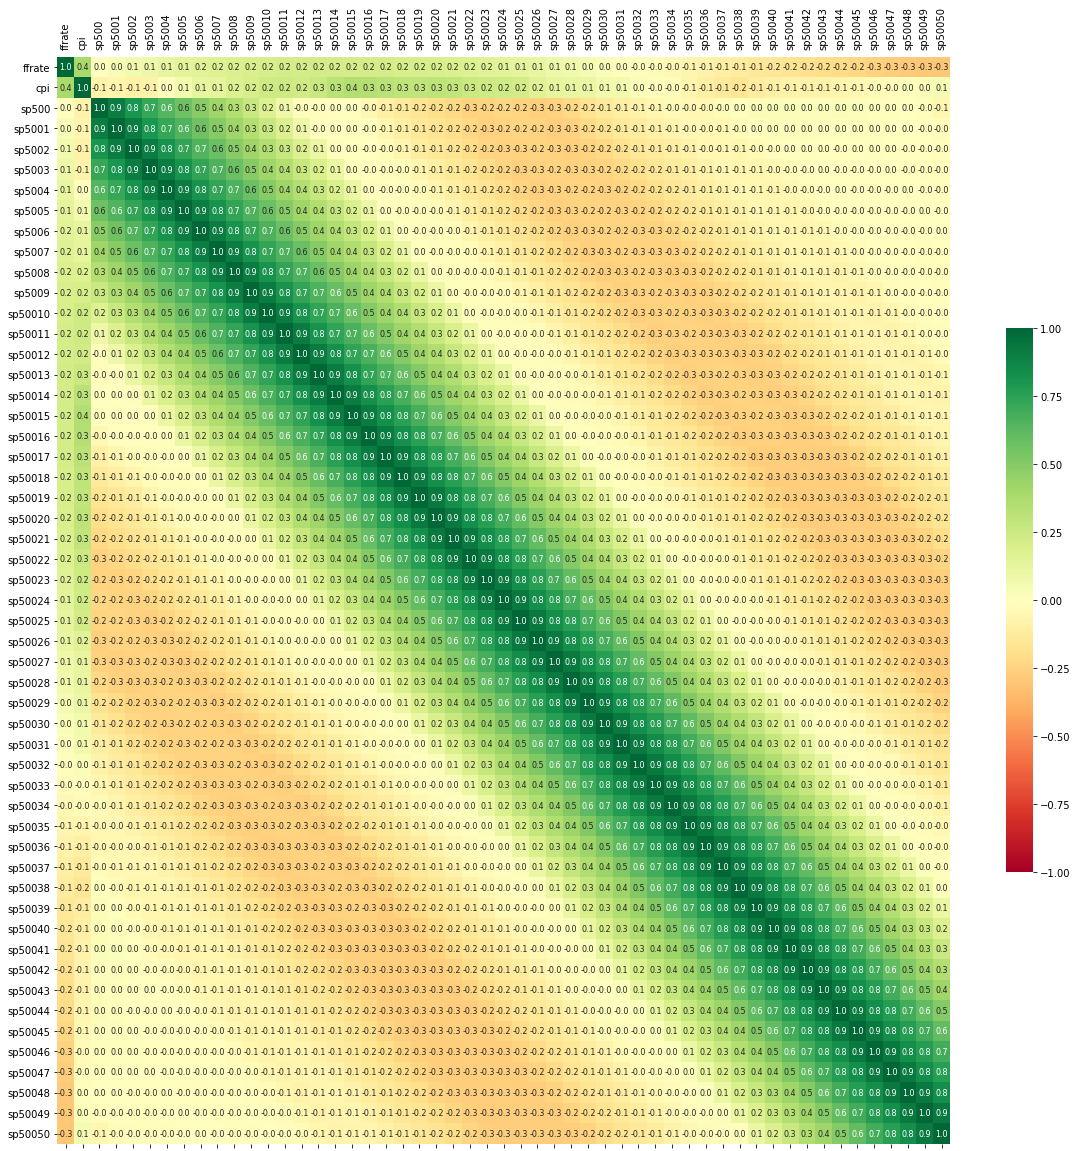

In [79]:
f, ax = plt.subplots(figsize=(20, 20))
cbar_kws = {
    "shrink": .5,
}
annot_kws = {
    'fontsize': 8
}
sns.heatmap(
    sprec.corr(),
    annot=True,
    annot_kws=annot_kws,
    fmt='0.1f',
    ax=ax,
    cmap="RdYlGn",
    cbar_kws=cbar_kws,
    vmin=-1,
    vmax=1
)
ax.tick_params(labelbottom=False, labeltop=True)
plt.xticks(rotation=90);

In [80]:
cpirec = recent.copy()
for i in range(1, 51):
    cpirec[f'cpi{i}'] = sprec['cpi'].shift(i)

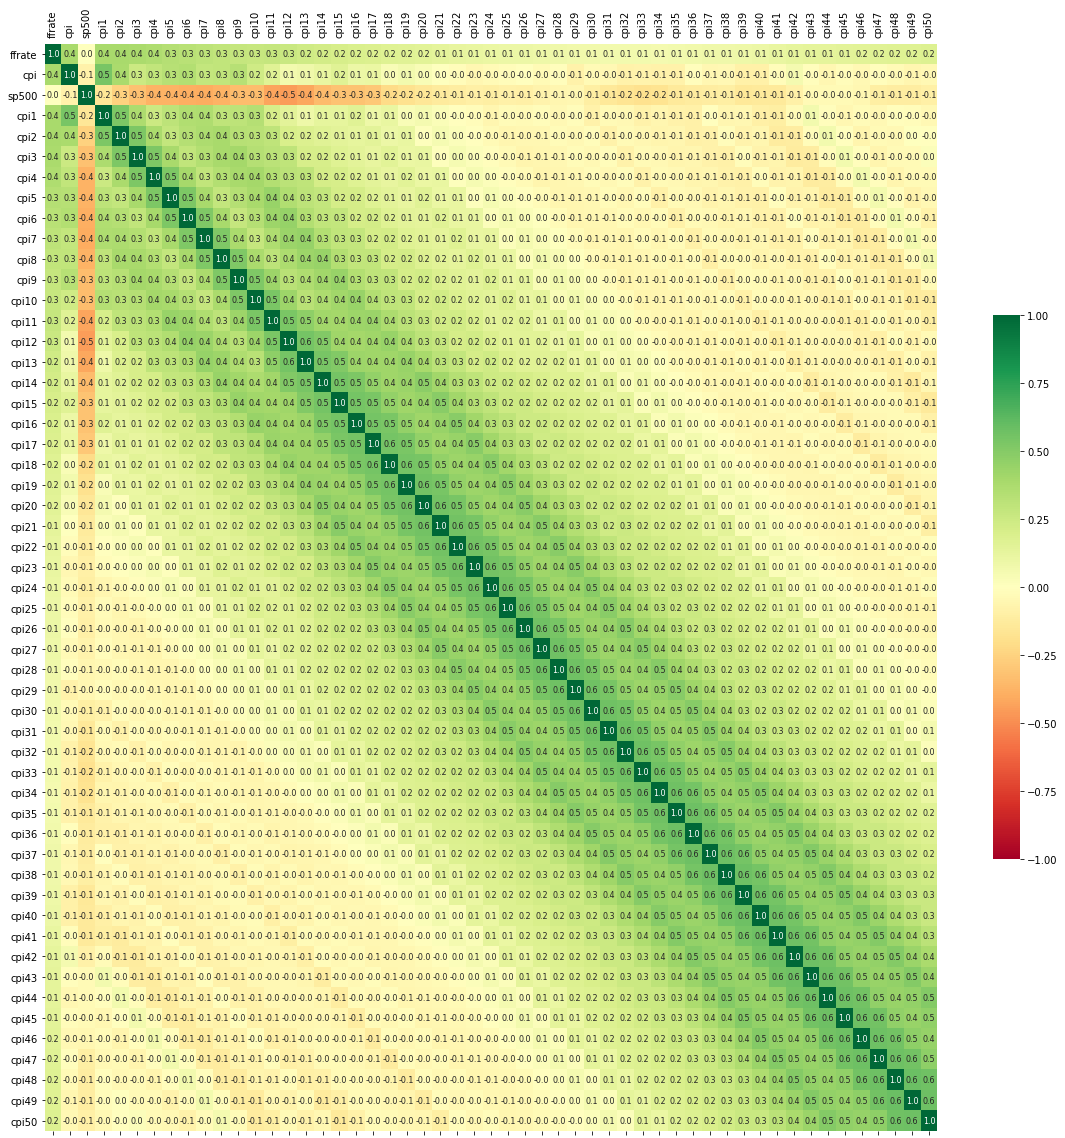

In [81]:
f, ax = plt.subplots(figsize=(20, 20))
cbar_kws = {
    "shrink": .5,
}
annot_kws = {
    'fontsize': 8
}
sns.heatmap(
    cpirec.corr(),
    annot=True,
    annot_kws=annot_kws,
    fmt='0.1f',
    ax=ax,
    cmap="RdYlGn",
    cbar_kws=cbar_kws,
    vmin=-1,
    vmax=1
)
ax.tick_params(labelbottom=False, labeltop=True)
plt.xticks(rotation=90);